# Live Lecture: Modifying Numpy Arrays

## (A). Indexing Warmup

Suppose that we have some data with some zero values. 

In [1]:
import numpy as np
x = np.random.rand(20)
x[np.random.randint(0, 20, 10)] = 0
x

array([0.12208993, 0.36000477, 0.        , 0.44804079, 0.57768463,
       0.30085428, 0.63856382, 0.31340486, 0.83025855, 0.        ,
       0.83405203, 0.        , 0.        , 0.        , 0.63993692,
       0.13917337, 0.044953  , 0.        , 0.16555049, 0.        ])

However, our experimenter wasn't very careful: zero values should actually be ignored in calculation. We'd like to replace the zero values with `np.nan`. What's the simplest way to do this? 

In [2]:
x[x == 0] = np.nan

In [3]:
# follow up: compute the mean
np.nanmean(x)

0.4165051862748597

In [4]:
# alternative (less versatile)
# x[x != 0].mean() 

## (B). Multidimensional Indexing

Beyond modifying individual entries, we can also modify entire rows or slices of data. 

In [5]:
A = np.array([[1, 2, 3], 
              [1, 2, 3], 
              [4, 5, 6], 
              [1, 2, 3], 
              [4, 5, 6]])
A

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [6]:
A == [1, 2, 3]

array([[ True,  True,  True],
       [ True,  True,  True],
       [False, False, False],
       [ True,  True,  True],
       [False, False, False]])

In [7]:
mask = np.all(A == [1, 2, 3], axis = 1)
mask

array([ True,  True, False,  True, False])

In [8]:
A[mask] = [7, 8, 9]
A

array([[7, 8, 9],
       [7, 8, 9],
       [4, 5, 6],
       [7, 8, 9],
       [4, 5, 6]])

## (B). Modifying Images (higher-dimensional arrays)

In this example, we'll take an XKCD comic and make it purple. In literature and film, this is called "being drunk with power." 

In [9]:
import matplotlib.image as mpimg 
comic = mpimg.imread('https://imgs.xkcd.com/comics/depth_and_breadth_2x.png')
comic

array([[[0.7882353 , 0.7882353 , 0.7882353 ],
        [0.1764706 , 0.1764706 , 0.1764706 ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.1254902 , 0.1254902 , 0.1254902 ],
        [0.7372549 , 0.7372549 , 0.7372549 ]],

       [[0.19607843, 0.19607843, 0.19607843],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.1764706 , 0.1764706 , 0.1764706 ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [10]:
comic.shape

(962, 749, 3)

In [11]:
# RGB color system: (R, G, B)
# comic[i,j] gives the 3 RGB values for pixel in 
# row i and column j

# [0, 0, 0] means black
comic[1, 1]

array([0., 0., 0.], dtype=float32)

In [12]:
# [1, 1, 1] means white
comic[10, 20]

array([1., 1., 1.], dtype=float32)

(-0.5, 748.5, 961.5, -0.5)

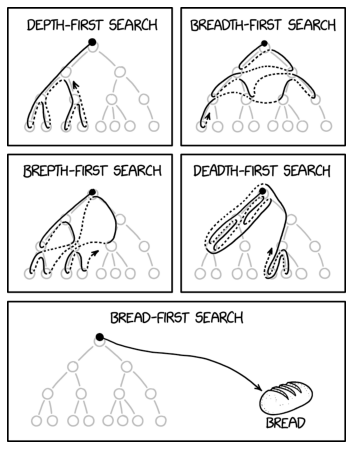

In [13]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, figsize = (8, 8))
ax.imshow(comic)
ax.axis("off")

In [14]:
# create a "mask" indicating which 
# pixels are shaded

mask = comic.max(axis = 2) < 0.3
mask.shape

(962, 749)

(-0.5, 748.5, 961.5, -0.5)

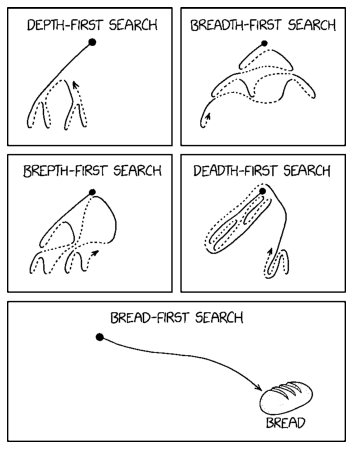

In [15]:
fig, ax = plt.subplots(1, figsize = (8, 8))
ax.imshow(mask, cmap = "binary")
ax.axis("off")

In [16]:
comic[mask]

# a pleasant purple
purple = np.array([[0.4, 0.2, 0.7]])
comic[mask] = purple

(-0.5, 748.5, 961.5, -0.5)

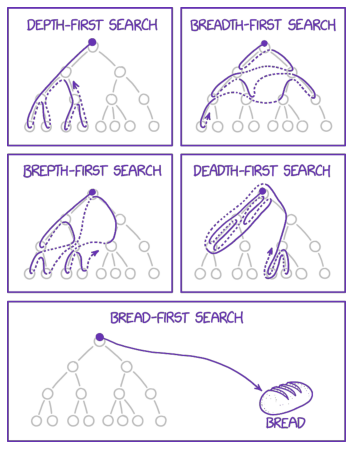

In [17]:
fig, ax = plt.subplots(1, figsize = (8, 8))
ax.imshow(comic)
ax.axis("off")

In [18]:
def recolor(img, threshold, color):
    mask = (img.max(axis = 2) < threshold)
    img[mask] = color
    return img

(-0.5, 748.5, 961.5, -0.5)

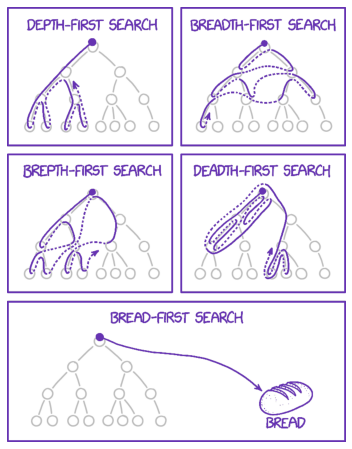

In [19]:
fig, ax = plt.subplots(1, figsize = (8, 8))
ax.imshow(recolor(comic, 0.7, purple))
ax.axis("off")

(-0.5, 1223.5, 801.5, -0.5)

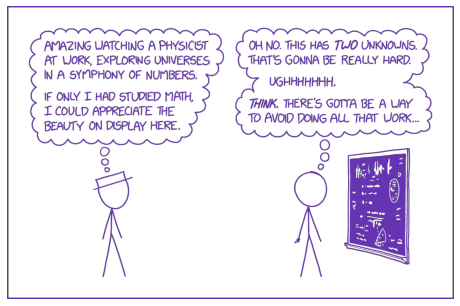

In [20]:
comic = mpimg.imread('https://imgs.xkcd.com/comics/math_work_2x.png')

fig, ax = plt.subplots(1, figsize = (8, 8))
ax.imshow(recolor(comic, 0.2, purple))
ax.axis("off")

(-0.5, 1223.5, 801.5, -0.5)

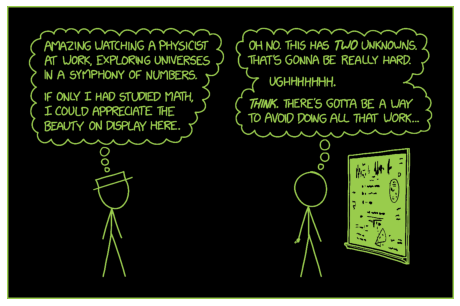

In [21]:
fig, ax = plt.subplots(1, figsize = (8,8))
ax.imshow(1 - recolor(comic, 0.7, purple))
ax.axis("off")